In [2]:
!pip list

Package                   Version
------------------------- ---------
anyio                     4.0.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.13.1
beautifulsoup4            4.12.2
bleach                    6.1.0
certifi                   2023.7.22
cffi                      1.16.0
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.1.4
contourpy                 1.2.0
cycler                    0.12.1
debugpy                   1.8.0
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.0.1
fastjsonschema            2.18.1
fonttools                 4.44.0
fqdn                      1.5.1
idna                      3.4
ipykernel                 6.26.0
ipython                   8.17.2
ipython-genutils          0.2.0
ipywidgets           

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [6]:
img = cv2.imread('city.jpg',3)

In [7]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_data = np.asarray(gray_image)

In [8]:
f = np.fft.fft2(img_data)

In [9]:
fshift = np.fft.fftshift(f)

In [10]:
# 7. Compute the magnitudes (absolute values) of the complex numbers from f
f = abs(f)

In [11]:
# 8. Compute the logarithm for each value to reduce the dynamic range
fourier = 20*np.log(f)
# 9. Find the minimum values that is a finite number (minimum of an array, ignoring any NaN):
lowest = np.nanmin(fourier[np.isfinite(fourier)])
# 10. Find the maximum values that is a finite number:
highest = np.nanmax(fourier[np.isfinite(fourier)])

# 11. Calculate the original contrast range:
contrast_range = highest - lowest

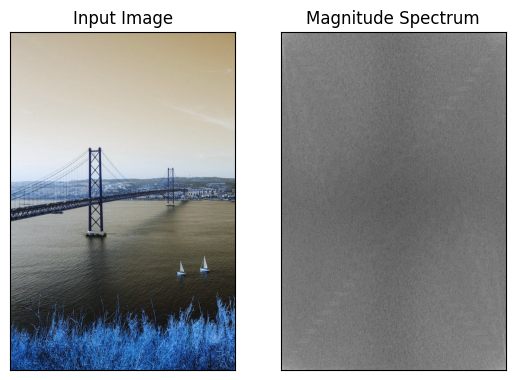

In [12]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(fourier, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
# 12. Normalize the Fourier spectrum data (“stretch” the contrast)
norm_fourier = (fourier - lowest) / contrast_range * 255

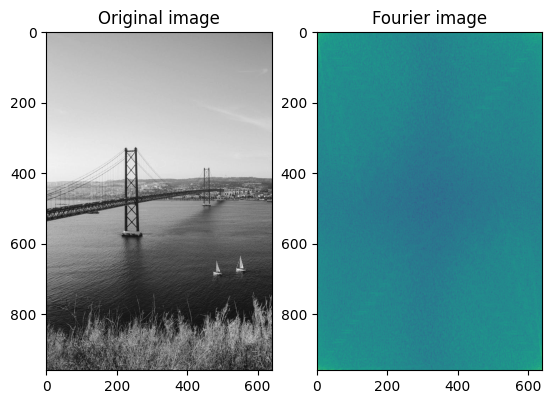

In [11]:
# 13. Display the original image and the fourier image
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1) # (rows, columns, panel number)
ax2 = fig.add_subplot(1, 2, 2) # (rows, columns, panel number)
ax1.imshow(gray_image, cmap = "gray")
ax2.imshow(norm_fourier)
ax1.title.set_text("Original image")
ax2.title.set_text("Fourier image")
plt.show()

In [ ]:
# 14. Save the figure (if you wish to)
# fig.savefig('my_figure.png')

In [22]:
# 15. Remove the low frequencies by masking with a rectangular window of size 60x60
rows, cols = norm_fourier.shape
crow, ccol = rows//2 , cols//2
norm_fourier [crow-30:crow+30, ccol-30:ccol+30] = 0

In [23]:
# 16. Apply the inverse shift so that DC component again come at the top-left corner
f_ishift = np.fft.ifftshift(norm_fourier)
# 17. Apply the inverse Fourier Transform:
img_back = np.fft.ifft2(f_ishift)
# 18. The result, again, will be a complex number. You can take its real value.
img_back = np.real(img_back)

In [1]:
# 19. Display the original image and the filtered image
fig2 = plt.figure()
ax1 = fig2.add_subplot(1, 2, 1)
ax2 = fig2.add_subplot(1, 2, 2)
# ax1.imshow(gray_image, cmap = "gray")
ax2.imshow(img_back, cmap = "gray")

# ax1.title.set_text("Original image")
ax1.title.set_text("Filtered image")
plt.show()

NameError: name 'plt' is not defined